<a href="https://colab.research.google.com/github/AzGustavo/Python/blob/main/Business_Intelligence_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Novo Python do Zero**
Módulo 4 - Business Intelligence com Python

---

# Introdução

Recém contratado em uma empresa de pequeno porte de Araraquara, com 15 funcionários, você assumiu uma vaga para ajudar a empresa a se modernizar, automatizar processos humanos e gerar inteligência de negócio.

Você está motivado na nova missão, e tem compartilhados *cases* publicados em *blogs* para seus colegas de trabalho, mostrando como usam o Python por aí e como "dados são o novo petróleo".

<img src="https://raw.githubusercontent.com/carlosfab/novo-python-do-zero/main/img/9bdccce68226641d9bda0f9c6aabe96e.jpg">

Nesse seu primeiro dia de trabalho, que coincidiu com a véspera de um feriado prolongado, você recebeu poucas tarefas. Com todos já naquele clima de calmaria que antecede todos os feriados nacionais, você olha a lista e fica aliviado em ver que são coisas relativamente tranquilas.

Mais do que apenas motivado, você está confiante nas suas habilidades. Afinal, não foram poucos os projetos que você fez nessa trilha de aprendizado; bastou uma passada rápida com os olhos para você concluir que o `pandas`, `numpy` e mais alguma biblioteca como `geopandas`, deveriam ser suficientes para resolver esses pepinos rapidamente.

Caneca de café reabastecida, você volta para a sala e faz uma pergunta que seria "básica" para você - mas que no mundo real, foi capaz de abalar toda aquela confiança com os projetos do seu portfólio:

**Onde estão os dados? Em que pasta eu acho as planilhas?**




## Projeto *Business Intelligence com GCP e Python*

A partir de agora nós iremos contextualizar o projeto do módulo. Apesar de ser uma situação fictícia, é próxima à realidade que os novos profissionais enfrentam ao lideram com problemas fora da CNTP (condições normais de temperatura e pressão).

Uma vez que você foi apresentado ao contexto do problema, recebeu os arquivos e entendeu a sua missão geral, irei apresentar as missões específicas do seu *emprego*.

Ao final deste, você será apresentado a algumas tarefas, onde terá que resolver sozinho e sem nenhum gabarito. Quero reforçar a importância dessas tarefas ao final, pois são elas que irão desenvolver a sua capacidade de pesquisa e auto-didatismo.


<center><img src="https://raw.githubusercontent.com/carlosfab/novo-python-do-zero/main/img/28955874330_6cf42a2c54_b.jpg" width= 200></center>


<br><br>

### ***📋 CHECKLIST* DO PROJETO**
✅ Transformar o pdf da planilha escaneada (`enderecos.pdf`) contendo os endereços dos clientes, em um DataFrame.
<br>✅ Obter as coordenadas (Latitude/Longitude) a partir dos endereços dos clientes.
<br>✅ Unificar os endereços com os dados pessoais dos clientes (`clientes_dados.csv`), a partir da coluna `id_cliente`.
<br>✅ Verificar a distância dos clientes até o local do evento, chamado "Estádio da Fonte Luminosa" de Araraquara.

<br>

Assim como foi explicado no *briefing* do módulo, nós iremos lidar com os arquivos **dentro do seu Google Drive pessoal**, em uma pasta qualquer que você tenha escolhido.

Também usaremos a autenticação do Document AI por meio das chaves que foram geradas quando configuramos o projeto e autorizamos as APIs.

Então, certifique-se de ter feito o upload dos seguintes arquivos no Google Drive:
 * `clientes_dados.csv`
 * `enderecos.pdf`
 * `sua-chave-gerada.json` (verifique o nome do seu arquivo gerado)


> Após executar as primeiras célular abaixo, será necessário autorizar o Colab a acessar o volume do Google Drive. Depois, é só navegar até a pasta do projeto, contendo os arquivos supracitados.

### Instalação das bibliotecas e autenticação

Com base no conhecimento adquirido até então, e considerando que você configurou corretamente o ambiente do *Console* e ativou as APIs necessárias, vamos começar instalando as bibliotecas que serão utilizadas e analisar os arquivos que teremos que lidar.

Lembre que, assim como comentamos na aula de Document AI, após instalar a biblioteca `google-cloud-documentai` você precisará reiniciar o *kernel* do Colab.

In [ ]:
# instalar produtos do Google Cloud
!pip install --upgrade google-cloud-documentai -q
!pip install googlemaps -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 184 kB 2.1 MB/s 
     |████████████████████████████████| 408 kB 29.5 MB/s 
     |████████████████████████████████| 47 kB 5.2 MB/s 
     |████████████████████████████████| 115 kB 74.1 MB/s 
     |████████████████████████████████| 4.7 MB 51.7 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.48.1
    Uninstalling grpcio-1.48.1:
      Successfully uninstalled grpcio-1.48.1
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.31.6
    Uninstalling google-api-core-1.31.6:
      Successfully uninstalled google-api-core-1.31.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=7ed4b1fe91a7a8613b3aa335d659e9d530fdb4666a5521dc810d4925c27a10f6
  Stored in directory: /root/.cache/pip/wheels/80/db/c0/6d958585fa97b20e250bf437acf7e6e715b4809c2dd4e55367
Successfully built googlemaps


In [ ]:
# Importar as bibliotecas necessárias
from google.oauth2 import service_account
from google.colab import drive
from typing import List, Sequence
import pandas as pd
from google.api_core.client_options import ClientOptions
from google.cloud import documentai_v1 as documentai
import json
import googlemaps
from datetime import datetime
import matplotlib.pyplot as plt

O que a linha `%env GOOGLE_APPLICATION_CREDENTIALS=$key_path` fará é criar uma variável no ambiente do servidor, com referência ao arquivo *json* que contém os dados para o Colab autenticar junto aos produtos do seu projeto no Google Cloud.

Obviamente estamos em um ambiente didático, mas fica o aviso: nunca compartilhe esse arquivo. Da mesma maneira, quando estiver lidando com *tokens* diretamente no *notebook*, tome cuidado para não publicar ou subir o arquivo em um repositório público.

Qualquer pessoa que detenha essa informação, irá ter acesso aos produtos ativados - ou seja, a fatura poderá vir alta!

In [ ]:
# Mount Google Drive
drive.mount('/content/drive/')

# Caminho até a sua pasta de projetos
PROJECT_PATH = "/content/drive/MyDrive/PDZ/Mod4"

# Indicar o caminho até o arquivo JSON para autenticação
key_path = 'Insira caminho do JSON' 

# Inserir uma variável no ambiente
%env GOOGLE_APPLICATION_CREDENTIALS=$key_path

Mounted at /content/drive/
env: GOOGLE_APPLICATION_CREDENTIALS=/content/drive/MyDrive/PDZ/Mod4/projeto-tutorial-362413-6fa05c9fc52c.json


## *Data Ingestion* e *Analytics*

Para atender todas as atribuições do *checklist*, nós iremos cumprir uma sequência de passos intermediários:

1. Converter o arquivo pdf contendo os endereços dos clientes (tabela do Excel impressa e escaneada) para uma estrutura de DataFrame, utilizando o Document AI (Form Parser).
2. Ler o arquivo csv contendo os dados pessoais dos clientes para uma estrutura de DataFrame, utilizando o Pandas.
3. Verificar a integridade dos dados e se os tipos são adequados a cada coluna.
4. Combinar os dois DataFrames em uma única variável, usando a coluna `id_cliente` como referência.
5. Obter as coordenadas geográficas de cada entrada do *dataset* unificado, por meio do Google Maps.
6. Gerar um novo arquivo `dados_completos.csv` e deixá-lo salvo no diretório do projeto, no Google Drive.
7. Obter a distância e tempo de deslocamento de cada cliente até o ponto marcante "Estádio da Fonte Luminosa, Araraquara - SP".
8. Você irá prosseguir adiante, aprofundando nas análises e gerando mais *insights* para a empresa.


### 1. Converter *pdf* em *DataFrame*

In [ ]:
"""
Fazer uma requisição para processamento ao Document AI
"""

# Troque pelos seus dados
project_id = ''  # id do projeto onde você ativou as APIs. Não é o id do processador, mas DO PROJETO
location = 'us' # 'us' ou 'eu', dependendo da sua escolha
processor_id = '' #  Não confunda com o processador OCR... use o processador Form Parser
file_path = '/content/drive/MyDrive/PDZ/Mod4/enderecos.pdf'
mime_type = 'application/pdf' 


def online_process(
    project_id: str,
    location: str,
    processor_id: str,
    file_path: str,
    mime_type: str,
) -> documentai.Document:
    """
    Processes a document using the Document AI Online Processing API.
    """

    # Instantiates a client
    docai_client = documentai.DocumentProcessorServiceClient(
        client_options=ClientOptions(
            api_endpoint=f"{location}-documentai.googleapis.com"
        )
    )

    # The full resource name of the processor, e.g.:
    # projects/project-id/locations/location/processor/processor-id
    # You must create new processors in the Cloud Console first
    resource_name = docai_client.processor_path(project_id, location, processor_id)

    # Read the file into memory
    with open(file_path, "rb") as file:
        file_content = file.read()

    # Load Binary Data into Document AI RawDocument Object
    raw_document = documentai.RawDocument(content=file_content, mime_type=mime_type)

    # Configure the process request
    request = documentai.ProcessRequest(name=resource_name, raw_document=raw_document)

    # Use the Document AI client to process the sample form
    result = docai_client.process_document(request=request)

    return result.document


def get_table_data(
    rows: Sequence[documentai.Document.Page.Table.TableRow], text: str
) -> List[List[str]]:
    """
    Get Text data from table rows
    """
    all_values: List[List[str]] = []
    for row in rows:
        current_row_values: List[str] = []
        for cell in row.cells:
            current_row_values.append(
                text_anchor_to_text(cell.layout.text_anchor, text)
            )
        all_values.append(current_row_values)
    return all_values


def text_anchor_to_text(text_anchor: documentai.Document.TextAnchor, text: str) -> str:
    """
    Document AI identifies table data by their offsets in the entirity of the
    document's text. This function converts offsets to a string.
    """
    response = ""
    # If a text segment spans several lines, it will
    # be stored in different text segments.
    for segment in text_anchor.text_segments:
        start_index = int(segment.start_index)
        end_index = int(segment.end_index)
        response += text[start_index:end_index]
    return response.strip().replace("\n", " ")


# Fazer a requisição e enviar o pdf ao processador Form Parser
document = online_process(
    project_id,
    location,
    processor_id,
    file_path,
    mime_type
)

# Extrair cabeçalho e linhas da tabela
header_row_values: List[List[str]] = []
body_row_values: List[List[str]] = []

# caso houvesse mais páginas no documento pdf
for page in document.pages:
    for table in page.tables:
        header_row_values = get_table_data(table.header_rows, document.text)
        body_row_values = get_table_data(table.body_rows, document.text)

# criar um Pandas Dataframe para armazenar os valores em formato tabular
df_enderecos = pd.DataFrame(
    data=body_row_values,
    columns=header_row_values[0],
)

In [ ]:
df_enderecos.head()

,id_cliente,logradouro,numero,bairro,cep,cidade,uf
0,1,Rua Bento de Miranda Mello,356,Residencial Olivio Benassi,15993-037,Matão,SP
1,2,Rua Ricardo Arruda Ribeiro,745,Água Branca,13425-100,Piracicaba,SP
2,3,Rua Dona Sylvia Finco Costa,870,Jardim Tapajós,12945-080,Atibaia,SP
3,4,Rua Axicará,433,Vila Isolina Mazzei,02081-080,São Paulo,SP
4,5,Rua Diamantino Armando,245,Vila Esperança,18703-800,Avaré,SP


### 2. Carregar *csv* em *DataFrame*

In [ ]:
df_dados = pd.read_csv("/content/drive/MyDrive/PDZ/Mod4/clientes_dados.csv", sep=";")

In [ ]:
df_dados.head()

,id_cliente,nome,email,sexo,cpf,data_nasc
0,1,Sebastiana Tânia Mendes,sebastiana_tania_mendes@trbvm.com,Feminino,938.319.088-42,06/01/1984
1,2,Andrea Débora Campos,andrea-campos75@caporal.biz,Feminino,782.328.538-08,06/01/1943
2,3,Rosa Jéssica Isis Barros,rosa.jessica.barros@optovac.com.br,Feminino,129.102.618-59,04/02/1970
3,4,Vinicius Carlos Eduardo da Rocha,viniciuscarlosdarocha@carreira.com.br,Masculino,437.270.578-66,22/06/1969
4,5,Cecília Milena Elisa Vieira,cecilia-vieira98@amure.com.br,Feminino,726.017.228-27,07/09/1948


### 3. Verificar e transformar dados

In [ ]:
df_enderecos.info()

In [ ]:
df_dados.info()

In [ ]:
pd.merge(df_dados, df_enderecos, on='id_cliente')

In [ ]:
df_enderecos['id_cliente'] = df_enderecos['id_cliente'].astype('int64')

In [ ]:
df_dados['data_nasc'] = pd.to_datetime(df_dados['data_nasc'], format='%d/%m/%Y')

In [ ]:
df_enderecos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  30 non-null     int64 
 1   logradouro  30 non-null     object
 2   numero      30 non-null     object
 3   bairro      30 non-null     object
 4   cep         30 non-null     object
 5   cidade      30 non-null     object
 6   uf          30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_cliente  30 non-null     int64         
 1   nome        30 non-null     object        
 2   email       30 non-null     object        
 3   sexo        30 non-null     object        
 4   cpf         30 non-null     object        
 5   data_nasc   30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.5+ KB


### 4. Combinar em um *DataFrame*

In [ ]:
df_completo = pd.merge(df_dados, df_enderecos, on='id_cliente')

In [ ]:
df_completo.head()

,id_cliente,nome,email,sexo,cpf,data_nasc,logradouro,numero,bairro,cep,cidade,uf
0,1,Sebastiana Tânia Mendes,sebastiana_tania_mendes@trbvm.com,Feminino,938.319.088-42,1984-01-06,Rua Bento de Miranda Mello,356,Residencial Olivio Benassi,15993-037,Matão,SP
1,2,Andrea Débora Campos,andrea-campos75@caporal.biz,Feminino,782.328.538-08,1943-01-06,Rua Ricardo Arruda Ribeiro,745,Água Branca,13425-100,Piracicaba,SP
2,3,Rosa Jéssica Isis Barros,rosa.jessica.barros@optovac.com.br,Feminino,129.102.618-59,1970-02-04,Rua Dona Sylvia Finco Costa,870,Jardim Tapajós,12945-080,Atibaia,SP
3,4,Vinicius Carlos Eduardo da Rocha,viniciuscarlosdarocha@carreira.com.br,Masculino,437.270.578-66,1969-06-22,Rua Axicará,433,Vila Isolina Mazzei,02081-080,São Paulo,SP
4,5,Cecília Milena Elisa Vieira,cecilia-vieira98@amure.com.br,Feminino,726.017.228-27,1948-09-07,Rua Diamantino Armando,245,Vila Esperança,18703-800,Avaré,SP


In [ ]:
df_completo.set_index('id_cliente', inplace=True)

In [ ]:
df_completo.head()

### 5. Obter coordenadas geográficas

In [ ]:
# API do Google Maps
gmaps = googlemaps.Client(key='INSERIR_CHAVE_API')

In [ ]:
# Gerar coluna com endereços completos, para minimizar conflitos
enderecos_completos = df_completo["logradouro"] + " , " + df_completo["numero"] + " - " + df_completo["bairro"] + " - " + df_completo["cidade"] + " , " + df_completo["uf"]

In [ ]:
# exemplo de endereço completo
enderecos_completos.iloc[0]

'Rua Bento de Miranda Mello , 356 - Residencial Olivio Benassi - Matão , SP'

In [ ]:
enderecos_completos.head()

In [ ]:
# Obter coordenadas de maneira iterativa
coordenadas = []

# percorrer entradas individuais e fazer requisições individuais
for i, j in enumerate(enderecos_completos):
    geocode_obj = gmaps.geocode(j)

    # extrair apenas lat/lon
    lat = geocode_obj[0]['geometry']['location']['lat']
    lon = geocode_obj[0]['geometry']['location']['lng']

    # adicionar lat/lon à lista
    coordenadas.append([lat, lon])

In [ ]:
geocode_obj[0]['geometry']['location']

{'lat': -23.6826179, 'lng': -46.3587757}

In [ ]:
# converter para DataFrame
df_coordenadas = pd.DataFrame(coordenadas, columns=['lat', 'lon'])

# Obter mesmo índice que o dataframe completo
df_coordenadas.set_index(df_coordenadas.index + 1, inplace=True)

### 6. Exportar *csv* com dados completos

In [ ]:
# combinar coordenadas aos dados existentes, em relação ao axis=1
df_completo = pd.concat([df_completo, df_coordenadas], axis=1)

In [ ]:
# exportar para arquivo csv dentro do Google Drive
df_completo.to_csv(PROJECT_PATH + 'dados_completos.csv')

### 7. Calcular distância até o evento

In [ ]:
local_do_evento = "Estádio da Fonte Luminosa, Araraquara - SP"

In [ ]:
# obter informações sobre o local do evento
obj = gmaps.geocode(local_do_evento)

lat_even = obj[0]['geometry']['location']['lat']
lon_even = obj[0]['geometry']['location']['lng']
print(lon_even, lat_even)

-48.1702765 -21.7752895


In [ ]:
# exemplo de como calcular distancia/tempo entre pontos, com data específica
dia_do_evento = datetime(2023, 12, 2)
directions_result = gmaps.directions("-21.620162, -48.366012",
                                     local_do_evento,
                                     mode="driving",
                                     departure_time=dia_do_evento)

In [ ]:
int(directions_result[0]['legs'][0]['distance']['value'] / 1000)

32

In [ ]:
directions_result[0]['legs'][0]['duration']['value'] / 60

35.88333333333333

In [ ]:
# obter todas as distâncias e tempos de estrada
lista_distancias = []
dia_do_evento = datetime(2023, 12, 2)

# percorrer entradas individuais e fazer requisições individuais
for i, j in enumerate(enderecos_completos):
    directions_result = gmaps.directions(j,
                                     local_do_evento,
                                     mode="driving",
                                     departure_time=dia_do_evento)

    # adicionar às listas
    distancia = directions_result[0]['legs'][0]['distance']['value']
    tempo = directions_result[0]['legs'][0]['duration']['value'] / 60
    lista_distancias.append([distancia, tempo])

In [ ]:
# converter para DataFrame
df_distancias = pd.DataFrame(lista_distancias, columns=['distancia', 'tempo'])

# Obter mesmo índice que o dataframe completo
df_distancias.set_index(df_distancias.index + 1, inplace=True)

In [ ]:
# combinar coordenadas aos dados existentes, em relação ao axis=1
df_evento = pd.concat([df_completo['nome'], df_distancias], axis=1)

In [ ]:
df_evento.head()

In [ ]:
# converter metros em kilometros (inteiro)
df_evento['distancia'] = (df_evento['distancia'] / 1000).astype('int64')

In [ ]:
df_lon_lat_dist = pd.concat([df_coordenadas['lon'], df_coordenadas['lat'], df_evento['distancia']], axis=1)

In [ ]:
df_evento.head()

## Momento mão na massa

Que tal você extrapolar as atividades que te foram designadas, e entregar insights que vão além da *obrigação*?

Atenção, não há gabarito para as tarefas abaixo. Mas eu te garanto que qualquer busca bem feita (documentação, forums e Google) irá entregar aquilo que você precisa.

Se você é iniciante, talvez pareça muito tempo "*estar há algumas horas na mesma questão, sem sair do lugar*".

**Bem-vindo à realidade, Neo!**

Antes de pedir qualquer tipo de ajuda no Circle, ou no suporte, **use uma semana inteira se precisar, para vasculhar a internet e encontrar a solução.** Caso contrário, você não vai desenvolver a principal habilidade do mercado: **autodidatismo** e **capacidade de resolver problemas**.

Boa sorte!<br><br>

### ***📋 CHECKLIST* DAS SUAS TAREFAS**
✅ Calcular a idade média dos seus clientes.
<br>✅ Ver Identificar o cliente que mora mais longe do local do evento.
<br>✅ Plotar as informações geográficas (Lat/Lon) em um mapa *(procure por `geopandas` no Google)*
<br>✅ [*Opcional*] Plotar um Mapa de Calor (*heatmap*).
<br>✅ [*Opcional*] Identificar alguma cidade que fique no "meio do caminho" para todos os clientes.

<br>


In [ ]:
# Função para calcular a idade dos clientes
from datetime import date

hoje = datetime(2022, 10, 2) # data atual em que se verificará a idade dos clientes

def idade(nascimento):
    ans = hoje.year - nascimento.year - ((hoje.month, hoje.day) < (nascimento.month, nascimento.day))
    return ans

In [ ]:
# Obter idade de cada cliente
idade_clientes = [] # armazena numa lista as idades de cada cliente
for data in df_completo['data_nasc']:
  aux = date(data.year, data.month, data.day)
  idade_clientes.append(idade(aux))

In [ ]:
# Calcular a idade média dos seus clientes.
import statistics
print('A idade média dos clientes é de', + round(statistics.mean(idade_clientes)), 'anos')

A idade média dos clientes é de 56 anos


In [ ]:
# Identificar o cliente que mora mais longe do local do evento.
coluna = df_evento['distancia'] # obtém coluna das distâncias
indice = coluna.idxmax() # encontra posição na coluna em que a distância é máxima
nome = df_evento['nome'][indice] # acha o nome na posição respectiva da coluna de nomes
print(nome, 'é o cliente que mora mais longe do local do evento')

Renato Vicente Antonio Freitas é o cliente que mora mais longe do local do evento


In [ ]:
# Plotar as informações geográficas (Lat/Lon) em um mapa
# Importar geopandas
!pip install geopandas -q
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 2.1 MB/s 
     |████████████████████████████████| 16.7 MB 302 kB/s 
     |████████████████████████████████| 6.3 MB 28.1 MB/s 


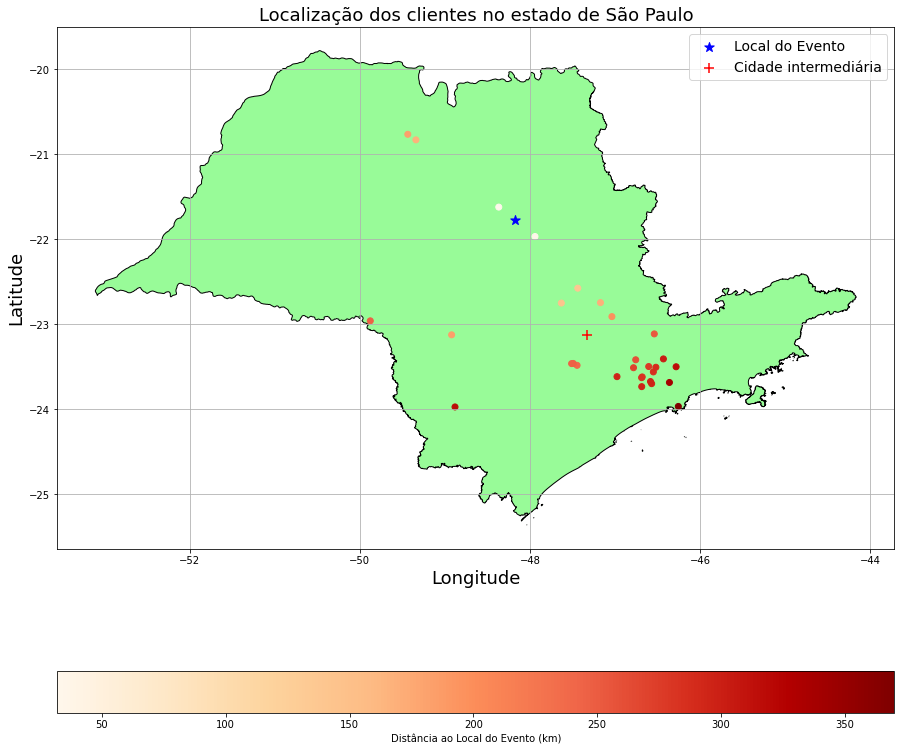

In [ ]:
# Fontes: https://geopandas.org/en/stable/docs/user_guide/mapping.html, https://www.alura.com.br/conteudo/geopandas-dados-geoespaciais
# 1º: plotar mapa do estado
mapa_SP = gpd.read_file('/content/drive/MyDrive/PDZ/Mod4/Mapa_SP/SP_UF_2021.shp') # Dados de SP retirados de geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/
fig, ax = plt.subplots(figsize=(15,15)) # Cria figura e axes
mapa_SP.plot(color='palegreen', edgecolor='black', ax=ax) # Plota os dados de SP

# 2º: plotar dados dos clientes
geometria = gpd.points_from_xy(x=df_lon_lat_dist['lon'], y=df_lon_lat_dist['lat']) # Cria geometria com as coordenadas dos clientes
distancias = df_lon_lat_dist.iloc[:,2].values
d = {'heat': distancias, 'geometry': geometria} # Criar um GeoDataFrame com uma coluna do calor e uma das posições
geo_df = gpd.GeoDataFrame(d)
geo_df.plot(ax=ax, column='heat', legend=True,
            legend_kwds={'label': "Distância ao Local do Evento (km)",
                         'orientation': "horizontal"}, cmap='OrRd')

# 3º: Plotar Local do evento
geometria2 = gpd.points_from_xy(x=[lon_even], y=[lat_even]) # Coordenadas do Local do evento
geo_df2 = gpd.GeoDataFrame(geometry = geometria2) # Cria o dataframe para ser usado pelo gpd
g2 = geo_df2.plot(ax=ax, markersize=100, color='blue', marker='*', label='Local do Evento')

geometria3 = gpd.points_from_xy(x=[lon_media], y=[lat_media]) # Coordenadas da cidade "no meio"
geo_df3 = gpd.GeoDataFrame(geometry = geometria3) # Cria o dataframe para ser usado pelo gpd
g3 = geo_df3.plot(ax=ax, markersize=100, color='red', marker='+', label='Cidade intermediária')

# 4º: Nomear eixos, legendas, etc.
plt.title('Localização dos clientes no estado de São Paulo', size=18)
plt.xlabel('Longitude', size=18)
plt.ylabel('Latitude', size=18)
leg = ax.legend(prop={'size': 14})
plt.grid()

plt.show()

In [ ]:
# Identificar alguma cidade que fique no "meio do caminho" para todos os clientes.
# Solução possível: obter uma média dos valores de latitude e longitude
lat_media = df_lon_lat_dist['lat'].mean()
lon_media = df_lon_lat_dist['lon'].mean()

In [ ]:
!pip install reverse-geocode
import reverse_geocode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 2.1 MB/s 
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4.1-py3-none-any.whl size=1637841 sha256=32a4468d745c8217debe5fcc457bb341e16283694c730842194133af9934f9e4
  Stored in directory: /root/.cache/pip/wheels/34/fd/8c/204b58f530154e61f182bcf1813a53b3ad5844faaff3df51d6
Successfully built reverse-geocode


In [ ]:
coordinates = (lat_media, lon_media), (lat_media, lon_media)
cidade = reverse_geocode.search(coordinates)
print('Cidade no meio do caminho sugerida:', cidade[0]['city'])

Cidade no meio do caminho sugerida: Salto


In [ ]:
cidade[0]['city']

'Salto'